In [1]:
import numpy as np
from scipy.io import loadmat


In [2]:
#Loading data
def load_mat_file(file_path):
    # Load .mat file
    data = loadmat(file_path)
    return data

file_path = 'mnist.mat'
mat_data = load_mat_file(file_path)


Problem 1.2 1.  (i) <- one-versus-one classifier

In [30]:

def all_pairs():
    return [[j, i] for i in range(1, 10) for j in range(0, i)]

def data_for_each_pair(pair, mat_data):
    print(pair)
    smaller_data_x = []
    smaller_data_y = []
    for x, y in zip(mat_data['trainX'], mat_data['trainY'][0]):
        if y in pair:
            normalized_x = x / 255

            x_with_bias = np.append(normalized_x, 1)

            smaller_data_x.append(x_with_bias)

            label = 1 if y == pair[0] else -1
            smaller_data_y.append(label)

    return smaller_data_x, smaller_data_y

def compute_theta(X, Y):
    X, Y = np.array(X), np.array(Y)
    X_transpose = X.T
    return np.dot(np.linalg.pinv(np.dot(X_transpose, X)), np.dot(X_transpose, Y))

def one_versus_one():
    return {tuple(pair): compute_theta(*data_for_each_pair(pair, mat_data)) for pair in all_pairs()}


In [31]:
parameters_of_one_versus_one = one_versus_one()

[0, 1]
[0, 2]
[1, 2]
[0, 3]
[1, 3]
[2, 3]
[0, 4]
[1, 4]
[2, 4]
[3, 4]
[0, 5]
[1, 5]
[2, 5]
[3, 5]
[4, 5]
[0, 6]
[1, 6]
[2, 6]
[3, 6]
[4, 6]
[5, 6]
[0, 7]
[1, 7]
[2, 7]
[3, 7]
[4, 7]
[5, 7]
[6, 7]
[0, 8]
[1, 8]
[2, 8]
[3, 8]
[4, 8]
[5, 8]
[6, 8]
[7, 8]
[0, 9]
[1, 9]
[2, 9]
[3, 9]
[4, 9]
[5, 9]
[6, 9]
[7, 9]
[8, 9]


Problem 1.2 1.  (ii) <- one-versus-all classifier

In [41]:

def data_for_one_vs_all(number):
    data_x, data_y = [], []
    for x, y in zip(mat_data['trainX'], mat_data['trainY'][0]):
        x = x/ 255
        data_x.append(np.append(x, 1))  # Adding bias here
        data_y.append(1 if y == number else -1)
    return data_x, data_y

def one_versus_all():
    parameters = {}
    for number in range(0, 10):
        X, Y = data_for_one_vs_all(number)
        theta = compute_theta(np.array(X), np.array(Y))
        parameters[number] = theta
    return parameters
################################################################################################################################################################################

In [42]:
parameters_of_one_versus_all = one_versus_all()

Problem 1.2 2. Evalution on traning data

In [266]:

def error_rate_one_to_one_classifier(datax, datay, parameter_pair_pairs):
    def one_versus_one_classifies(x):
        normalized_x = x / 255

        normalized_x = np.append(normalized_x, 1)
        output = {i: 0 for i in range(10)}
        max_class, max_count = None, -1

        for (smaller, higher), params in parameter_pair_pairs.items():
            predicted = np.dot(params, normalized_x)
            chosen_class = smaller if predicted > 0 else higher
            output[chosen_class] += 1

            if output[chosen_class] > max_count:
                max_class, max_count = chosen_class, output[chosen_class]

        return max_class

    num_of_error = sum(1 for x, y in zip(datax, datay[0]) if one_versus_one_classifies(x) != y)
    return num_of_error / len(datay[0])


In [162]:
def label_error_one_to_one_classifier(datax, datay, parameter_pair_pairs):
    def one_versus_one_classifies(x):
        normalized_x = x / 255

        normalized_x = np.append(normalized_x, 1)
        output = {i: 0 for i in range(10)}
        max_class, max_count = None, -1

        for (smaller, higher), params in parameter_pair_pairs.items():
            predicted = np.dot(params, normalized_x)
            chosen_class = smaller if predicted > 0 else higher
            output[chosen_class] += 1

            if output[chosen_class] > max_count:
                max_class, max_count = chosen_class, output[chosen_class]

        return max_class
    predicted_labels = [one_versus_one_classifies(x) for x in datax]
    label_errors = {}
    net_count = {}

    for real, predicted in zip(datay, predicted_labels):
        if real != predicted:
            label_errors[real] = label_errors.get(real, 0) + 1
        net_count[real] = net_count.get(real, 0) + 1

    error_rate_per_label = {label: (label_errors.get(label, 0) / max(net_count.get(label, 1), 1)) for label in set(datay)}

    
    return error_rate_per_label

In [163]:
print(label_error_one_to_one_classifier(mat_data['trainX'], mat_data['trainY'][0],parameters_of_one_versus_one ))

{0: 0.020091170015195003, 1: 0.017947196677543756, 2: 0.07368244377307821, 3: 0.09036046321970315, 4: 0.044505306401917154, 5: 0.08411732152739347, 6: 0.03852652923284894, 7: 0.05778132482043097, 8: 0.12117586737309861, 9: 0.08169440242057488}


In [265]:
def one_versus_all_classify(x, parameters):
    x = x/255
    x = np.append(x, 1)  
    predictions = {digit: np.dot(params, x) for digit, params in parameters.items()} # get prediction
    return max(predictions, key=predictions.get) 
def error_rate_one_to_all_classifier(datax, datay, parameters):
    num_of_error = 0 

    for x, y in zip(datax, datay[0]):
        predict = one_versus_all_classify(x, parameters) 
        if predict != y:
            num_of_error += 1
    return num_of_error / len(datay[0])

################################################################################################################################################################################

In [167]:
def label_error_rate_one_to_all_classifier(datax, datay, parameters):
    errors = { 0: 0, 1: 0, 2 : 0 , 3: 0, 4: 0, 5: 0, 6 : 0, 7 : 0, 8: 0, 9 : 0}
    total = { 0: 0, 1: 0, 2 : 0 , 3: 0, 4: 0, 5: 0, 6 : 0, 7 : 0, 8: 0, 9 : 0}
    for i, y in enumerate(datay[0]):
        predict = one_versus_all_classify(datax[i], parameters)
        total[y] += 1
        if predict != y:
            errors[y] += 1
    output = { 0: 0, 1: 0, 2 : 0 , 3: 0, 4: 0, 5: 0, 6 : 0, 7 : 0, 8: 0, 9 : 0}
    for i in range(10):
        output[i] = errors[i]/total[i]
    return output

In [169]:
print(label_error_rate_one_to_all_classifier(mat_data['trainX'], mat_data['trainY'],parameters_of_one_versus_all ))

{0: 0.04068884011480669, 1: 0.02877484425986354, 2: 0.19570325612621686, 3: 0.15870167998695156, 4: 0.10783978089695309, 5: 0.2637889688249401, 6: 0.07468739438999662, 7: 0.13391859537110934, 8: 0.24594086480943428, 9: 0.19868885526979324}


In [34]:

def confusion_matrix_for_one_to_one(datax, datay, parameter_pair_pairs):
    def one_versus_one_classifies(x, parameter_pair_pairs):
        normalized_x = x / 255
        x = np.append(normalized_x, 1)  
        output = {i: 0 for i in range(10)}

        for (smaller, higher), params in parameter_pair_pairs.items():
            predicted = np.dot(params, x)
            chosen_class = smaller if predicted > 0 else higher
            output[chosen_class] += 1

        return max(output, key=output.get)  

    con_matrix = np.zeros((10, 10))
    
    for i, y in enumerate(datay[0]):
        predict = one_versus_one_classifies(datax[i], parameter_pair_pairs)
        con_matrix[y, predict] += 1
    return con_matrix


In [47]:

def one_versus_all_classify(x, parameters):
    x = x/255
    x = np.append(x, 1)  
    predictions = {digit: np.dot(params, x) for digit, params in parameters.items()}
    return max(predictions, key=predictions.get)

def confusion_matrix_for_one_to_all(datax, datay, parameters):
    matrix = np.zeros((10, 10))

    for x, y in zip(datax, datay[0]):
        y = int(y)  
        predict = one_versus_all_classify(x, parameters)
        matrix[y][predict] += 1

    return matrix


In [267]:
error_rate_of_one_to_one_on_train = error_rate_one_to_one_classifier(mat_data['trainX'], mat_data['trainY'], parameters_of_one_versus_one ) # this is error rate of one-versus-one classifiers on training set
label_error_one_to_one_classifiers_train = label_error_one_to_one_classifier(mat_data['trainX'], mat_data['trainY'][0],parameters_of_one_versus_one )
confusion_matrix_of_one_to_one_on_train = confusion_matrix_for_one_to_one(mat_data['trainX'], mat_data['trainY'], parameters_of_one_versus_one) # this is confusion matrix of one-versus-one classifiers on training set
error_rate_of_one_to_all_on_train = error_rate_one_to_all_classifier(mat_data['trainX'], mat_data['trainY'], parameters_of_one_versus_all ) # this is error rate of one-versus-all classifiers on training set
confusion_matrix_of_one_to_all_on_train = confusion_matrix_for_one_to_all(mat_data['trainX'], mat_data['trainY'], parameters_of_one_versus_all) # this is confusion matrix of one-versus-all classifiers on training set
label_error_one_to_all_classifiers_train = label_error_rate_one_to_all_classifier(mat_data['trainX'], mat_data['trainY'],parameters_of_one_versus_all )


In [268]:
print(error_rate_of_one_to_one_on_train)
print(label_error_one_to_one_classifiers_train)
print(confusion_matrix_of_one_to_one_on_train)
print(error_rate_of_one_to_all_on_train)
print(confusion_matrix_of_one_to_all_on_train)
print(label_error_one_to_all_classifiers_train)

0.062233333333333335
{0: 0.020091170015195003, 1: 0.017947196677543756, 2: 0.07368244377307821, 3: 0.09036046321970315, 4: 0.044505306401917154, 5: 0.08411732152739347, 6: 0.03852652923284894, 7: 0.05778132482043097, 8: 0.12117586737309861, 9: 0.08169440242057488}
[[5.806e+03 3.000e+00 1.500e+01 8.000e+00 1.100e+01 1.900e+01 2.200e+01
  6.000e+00 3.200e+01 1.000e+00]
 [2.000e+00 6.623e+03 3.600e+01 1.700e+01 7.000e+00 1.600e+01 2.000e+00
  1.100e+01 2.100e+01 7.000e+00]
 [5.100e+01 6.800e+01 5.522e+03 4.900e+01 5.700e+01 2.000e+01 4.200e+01
  4.400e+01 9.200e+01 1.300e+01]
 [2.600e+01 4.200e+01 1.190e+02 5.579e+03 9.000e+00 1.610e+02 1.800e+01
  4.800e+01 9.000e+01 3.900e+01]
 [1.400e+01 1.800e+01 2.000e+01 5.000e+00 5.586e+03 1.100e+01 1.400e+01
  1.600e+01 8.000e+00 1.500e+02]
 [4.400e+01 4.800e+01 3.900e+01 1.380e+02 2.200e+01 4.968e+03 9.300e+01
  1.000e+01 4.600e+01 1.300e+01]
 [2.700e+01 1.600e+01 3.600e+01 2.000e+00 3.200e+01 8.400e+01 5.690e+03
  0.000e+00 3.000e+01 1.000e+00]


Problem 1.2 3. Evalution on testing data

In [269]:
error_rate_of_one_to_one_on_test = error_rate_one_to_one_classifier(mat_data['testX'], mat_data['testY'], parameters_of_one_versus_one ) # this is error rate of one-versus-one classifiers on training set
label_error_one_to_one_classifiers_test = label_error_one_to_one_classifier(mat_data['testX'], mat_data['testY'][0],parameters_of_one_versus_one )
confusion_matrix_of_one_to_one_on_test = confusion_matrix_for_one_to_one(mat_data['testX'], mat_data['testY'], parameters_of_one_versus_one) # this is confusion matrix of one-versus-one classifiers on training set
error_rate_of_one_to_all_on_test = error_rate_one_to_all_classifier(mat_data['testX'], mat_data['testY'], parameters_of_one_versus_all ) # this is error rate of one-versus-all classifiers on training set
confusion_matrix_of_one_to_all_on_test = confusion_matrix_for_one_to_all(mat_data['testX'], mat_data['testY'], parameters_of_one_versus_all) # this is confusion matrix of one-versus-all classifiers on training set
label_error_one_to_all_classifiers_test = label_error_rate_one_to_all_classifier(mat_data['testX'], mat_data['testY'],parameters_of_one_versus_all )


In [273]:
print("error_rate of one to one classifier is" + str(error_rate_of_one_to_one_on_train))
print()
print()
print("label data rate that show for each digit how much the model is confused on training data for onetoone model->"+ str(label_error_one_to_one_classifiers_train))
print()
print()

print("confusion marix of onetoone on train" + str(confusion_matrix_of_one_to_one_on_train))
print()
print()

print("Overall error rate of one to all on train" +str(error_rate_of_one_to_all_on_train))
print()
print()
print("confusion marix of onetoall on train"+str(confusion_matrix_of_one_to_all_on_train))
print()
print()
print("label data rate that show for each digit how much the model is confused on training data for onetoall model "+str(label_error_one_to_all_classifiers_train))
print()
print()
print("Overall error rate of one to one on test"+ str(error_rate_of_one_to_one_on_test))
print()
print()
print("label data rate that show for each digit how much the model is confused on test data for onetoone model" + str(label_error_one_to_one_classifiers_test))
print()
print()
print("confusion marix of onetoone on test"+ str(confusion_matrix_of_one_to_one_on_test))
print()
print()
print("Overall error rate of one to all on test"+ str(error_rate_of_one_to_all_on_test))
print()
print()
print("coonfusion matrix of one to all on test"+str(confusion_matrix_of_one_to_all_on_test))
print()
print()
print("label data rate that show for each digit how much the model is confused on test data for onetoone model"+str(label_error_one_to_all_classifiers_test))

error_rate of one to one classifier is0.062233333333333335


label data rate that show for each digit how much the model is confused on training data for onetoone model->{0: 0.020091170015195003, 1: 0.017947196677543756, 2: 0.07368244377307821, 3: 0.09036046321970315, 4: 0.044505306401917154, 5: 0.08411732152739347, 6: 0.03852652923284894, 7: 0.05778132482043097, 8: 0.12117586737309861, 9: 0.08169440242057488}


confusion marix of onetoone on train[[5.806e+03 3.000e+00 1.500e+01 8.000e+00 1.100e+01 1.900e+01 2.200e+01
  6.000e+00 3.200e+01 1.000e+00]
 [2.000e+00 6.623e+03 3.600e+01 1.700e+01 7.000e+00 1.600e+01 2.000e+00
  1.100e+01 2.100e+01 7.000e+00]
 [5.100e+01 6.800e+01 5.522e+03 4.900e+01 5.700e+01 2.000e+01 4.200e+01
  4.400e+01 9.200e+01 1.300e+01]
 [2.600e+01 4.200e+01 1.190e+02 5.579e+03 9.000e+00 1.610e+02 1.800e+01
  4.800e+01 9.000e+01 3.900e+01]
 [1.400e+01 1.800e+01 2.000e+01 5.000e+00 5.586e+03 1.100e+01 1.400e+01
  1.600e+01 8.000e+00 1.500e+02]
 [4.400e+01 4.800e+01 3

Problem 2.2

1
30
50
70
100
150
300
400
500
700
1000
1200


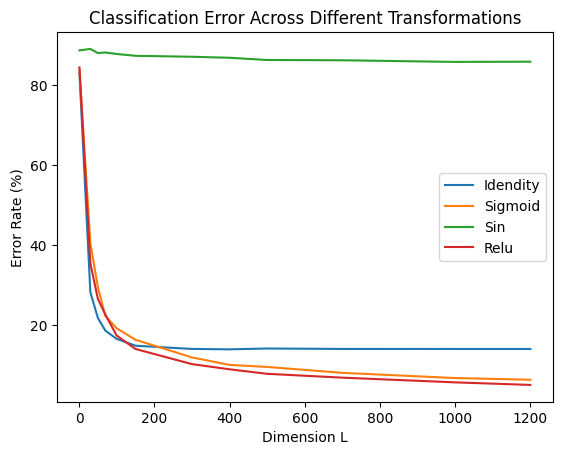

In [284]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def fetch_data(image_key, label_key, file="mnist.mat"):
    dataset = loadmat(file)
    image_data = dataset[image_key] / 255.0
    label_data = dataset[label_key].flatten()
    return image_data.astype(np.float64), label_data

def solve_linear(features, labels):
    augmented_features = np.insert(features, 0, 1, axis=1)
    return np.linalg.pinv(augmented_features.T @ augmented_features) @ augmented_features.T @ labels

def modify_label_for_classification(labels, class_number, method='one_vs_all'):
    if method == 'one_vs_all':
        return np.where(labels == class_number, 1, -1)
    return labels

def generate_classifiers(features, labels, total_classes, method='one_vs_all'):
    all_classifiers = []
    for class_num in range(total_classes):
        modified_labels = modify_label_for_classification(labels, class_num, method)
        classifier = solve_linear(features, modified_labels)
        all_classifiers.append(classifier)
    return all_classifiers

def classify_data(features, classifiers):
    augmented_features = np.insert(features, 0, 1, axis=1)
    classification_scores = np.array([augmented_features @ clf for clf in classifiers])
    return np.argmax(classification_scores, axis=0)

def calculate_error_rate(true_vals, predicted_vals):
    return np.sum(true_vals != predicted_vals) / len(true_vals) * 100

def generate_confusion_matrix(true_vals, predicted_vals, num_classes):
    confusion_mat = np.zeros((num_classes, num_classes), dtype=int)
    for actual, predicted in zip(true_vals, predicted_vals):
        confusion_mat[int(actual), int(predicted)] += 1
    return confusion_mat

def transform_features_via_mapping(input_features, dimension, transform_type, weight_matrix, bias_vector):
    transformation_functions = {
        'idendity': lambda x: x,
        'sigmoid': lambda x: 1 / (1 + np.exp(-x)),
        'sin': np.sin,
        'Relu': lambda x: np.maximum(x, 0)
    }
    return np.array([transformation_functions[transform_type](weight_matrix @ feature + bias_vector) for feature in input_features])

train_images, train_labels = fetch_data('trainX', 'trainY')
test_images, test_labels = fetch_data('testX', 'testY')

num_classes = 10
classifiers_ova = generate_classifiers(train_images, train_labels, num_classes)
predictions_ova = classify_data(test_images, classifiers_ova)
error_ova = calculate_error_rate(test_labels, predictions_ova)
conf_matrix_ova = generate_confusion_matrix(test_labels, predictions_ova, num_classes)

dimensions_L = [1, 30, 50, 70, 100, 150, 300, 400, 500, 700, 1000, 1200]
transformation_errors = {key: [] for key in ['idendity', 'sigmoid', 'sin', 'Relu']}

for dim in dimensions_L:
    print(dim)
    W_mat, bias_vec = np.random.randn(dim, 784), np.random.randn(dim)
    for trans_type in transformation_errors:
        transformed_train = transform_features_via_mapping(train_images, dim, trans_type, W_mat, bias_vec)
        transformed_test = transform_features_via_mapping(test_images, dim, trans_type, W_mat, bias_vec)
        classifiers = generate_classifiers(transformed_train, train_labels, num_classes)
        pred = classify_data(transformed_test, classifiers)
        transformation_errors[trans_type].append(calculate_error_rate(test_labels, pred))

for key, values in transformation_errors.items():
    plt.plot(dimensions_L, values, label=key.capitalize())
plt.xlabel('Dimension L')
plt.ylabel('Error Rate (%)')
plt.legend()
plt.title('Classification Error Across Different Transformations')
plt.show()
